In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
folder_path = r"\\10.99.68.53\Digital pathology image lib\_Image libraries for training\2023-05-09 Published HE Nuclei Datasets\Segmentation Scores on Interpolations"

In [3]:
models = ['SD_HE_20x', '2D_versatile_he', 'HN_CoNSeP', 'HN_CPM17', 'HN_Kumar']
# models = ['2D_versatile_he', 'SD_HE_20x', 'HN_CoNSeP', 'HN_CPM17', 'HN_Kumar']
dfs = [pd.read_csv(os.path.join(folder_path, model + '.csv')) for model in models]
df_splits = pd.read_csv(os.path.join(folder_path, 'SPLITS.csv'))
ordering = ['L - 40x - __',
            'L - 20x - 0_', 'L - 20x - 1_', 'L - 20x - 3_',
            'L - 40x - 00', 'L - 40x - 01', 'L - 40x - 03',
            'L - 40x - 10', 'L - 40x - 11', 'L - 40x - 13',
            'L - 40x - 30', 'L - 40x - 31', 'L - 40x - 33',
            'R - 20x - 33', 'R - 20x - 31', 'R - 20x - 30',
            'R - 20x - 13', 'R - 20x - 11', 'R - 20x - 10',
            'R - 20x - 03', 'R - 20x - 01', 'R - 20x - 00',
            'R - 40x - 3_', 'R - 40x - 1_', 'R - 40x - 0_',
            'R - 20x - __']

In [4]:
for i, df in enumerate(dfs):
    df = df[df['Tau'] == 0.5]
    df.loc[:, 'Interpolation'] = pd.Categorical(df['Interpolation'], categories=ordering, ordered=True)
    df = df.sort_values(by='Interpolation')
    df = pd.merge(left=df, right=df_splits, how='left', on=['Dataset', 'Tile'])
    df['SubTEST'].fillna(False, inplace=True)
    df = df[(df['SubTEST'] ==  True) | (df['Dataset'] == 'JHU')]
    df.drop_duplicates(inplace=True)
    dfs[i] = df
df

,Model,Interpolation,Dataset,Tile,Tau,TP,FP,FN,Precision,Recall,F1-Score,Panoptic Quality,Split,SubTEST
16,HN_Kumar,L - 20x - 0_,TNBC,01_4,0.5,33,4,84,0.891892,0.282051,0.428571,0.358514,Test,True
30,HN_Kumar,L - 20x - 0_,TNBC,01_6,0.5,4,0,4,1.000000,0.500000,0.666667,0.542299,Test,True
60,HN_Kumar,L - 20x - 0_,TNBC,11_2,0.5,9,0,29,1.000000,0.236842,0.382979,0.298935,Test,True
66,HN_Kumar,L - 20x - 0_,TNBC,03_1,0.5,29,1,37,0.966667,0.439394,0.604167,0.480772,Test,True
79,HN_Kumar,L - 20x - 0_,TNBC,05_1,0.5,59,7,90,0.893939,0.395973,0.548837,0.412310,Test,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,HN_Kumar,R - 40x - 3_,JHU,FallopianTube_test_2,0.5,217,98,350,0.688889,0.382716,0.492063,0.354066,NaN,False
2622,HN_Kumar,R - 40x - 3_,JHU,FallopianTube_test_1,0.5,245,104,397,0.702006,0.381620,0.494450,0.367448,NaN,False
2623,HN_Kumar,R - 40x - 3_,JHU,Skin_train_4,0.5,229,36,167,0.864151,0.578283,0.692890,0.549404,NaN,False
2624,HN_Kumar,R - 40x - 3_,JHU,Pancreas_test_4,0.5,154,30,139,0.836957,0.525597,0.645702,0.501137,NaN,False


In [5]:
for i, df in enumerate(dfs):
    df = df.groupby(by=['Interpolation']).agg(
        {'Precision': ['mean', 'std'], 'Recall': ['mean', 'std'], 'F1-Score': ['mean', 'std'], 'Panoptic Quality': ['mean', 'std']}).reset_index(drop=False)
    dfs[i] = df
df

Interpolation Precision              Recall            F1-Score             
                      mean       std      mean       std      mean       std   
0   L - 20x - 0_  0.896744  0.093574  0.400770  0.108215  0.545130  0.109123  \
1   L - 20x - 1_  0.889493  0.094693  0.393118  0.105980  0.536908  0.104153   
2   L - 20x - 3_  0.862991  0.091198  0.389943  0.103807  0.526966  0.093682   
3   L - 40x - 00  0.891942  0.065666  0.681433  0.115802  0.770775  0.097577   
4   L - 40x - 01  0.884941  0.053948  0.632272  0.128385  0.733570  0.103310   
5   L - 40x - 03  0.891116  0.069087  0.698055  0.117003  0.781094  0.098666   
6   L - 40x - 10  0.900609  0.047055  0.656021  0.116595  0.756275  0.093250   
7   L - 40x - 11  0.871407  0.041937  0.594833  0.118495  0.701817  0.096033   
8   L - 40x - 13  0.901084  0.049713  0.673808  0.106931  0.768709  0.084765   
9   L - 40x - 30  0.885609  0.025215  0.683144  0.104979  0.768041  0.069899   
10  L - 40x - 31  0.882759  0.040107  0.622381  0.095985  0.726830  0.073654   
11  L - 40x - 33  0.888042  0.059476  0.689032  0.104334  0.774062  0.085135   
12  L - 40x - __  0.888594  0.037783  0.716007  0.105556  0.789802  0.071682   
13  R - 20x - 00  0.791685  0.113016  0.375157  0.165729  0.488190  0.179747   
14  R - 20x - 01  0.791673  0.115263  0.374283  0.166491  0.487257  0.180578   
15  R - 20x - 03  0.794536  0.114785  0.377081  0.166936  0.489920  0.180983   
16  R - 20x - 10  0.785074  0.115882  0.370945  0.164758  0.483981  0.178068   
17  R - 20x - 11  0.783168  0.120301  0.369259  0.167713  0.481501  0.182060   
18  R - 20x - 13  0.788828  0.118337  0.372749  0.166694  0.485817  0.180373   
19  R - 20x - 30  0.785453  0.112747  0.375221  0.162188  0.487908  0.174553   
20  R - 20x - 31  0.789925  0.115599  0.373960  0.166522  0.486701  0.180688   
21  R - 20x - 33  0.795038  0.115447  0.376215  0.166409  0.489554  0.180402   
22  R - 20x - __  0.792169  0.114265  0.375771  0.165876  0.488508  0.180122   
23  R - 40x - 0_  0.788356  0.077303  0.537048  0.136338  0.630950  0.117601   
24  R - 40x - 1_  0.790195  0.082614  0.517141  0.137504  0.616402  0.121661   
25  R - 40x - 3_  0.776263  0.085806  0.528306  0.136751  0.619589  0.117833   

   Panoptic Quality            
               mean       std  
0          0.428023  0.085287  
1          0.418712  0.084215  
2          0.411557  0.074575  
3          0.590932  0.073437  
4          0.555572  0.071747  
5          0.595212  0.072716  
6          0.574320  0.063478  
7          0.525741  0.062967  
8          0.577181  0.056499  
9          0.581663  0.050723  
10         0.548745  0.054892  
11         0.583241  0.056283  
12         0.616014  0.063210  
13         0.378666  0.147903  
14         0.378842  0.149381  
15         0.381104  0.149566  
16         0.371011  0.144560  
17         0.374419  0.150620  
18         0.377568  0.149259  
19         0.374486  0.142611  
20         0.378413  0.149403  
21         0.380337  0.149225  
22         0.380227  0.149257  
23         0.487339  0.107046  
24         0.474038  0.108906  
25         0.476900  0.105421

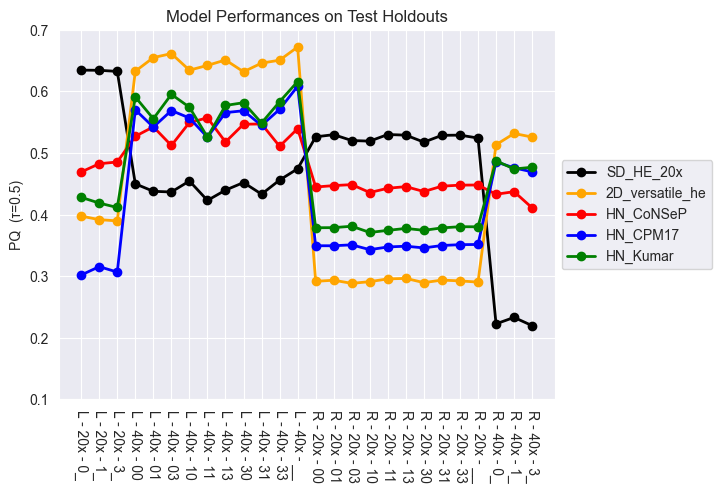

In [6]:
fig, ax = plt.subplots()
colors = ['black', 'orange', 'red', 'blue', 'green']
for i, df in enumerate(dfs):
    ax.plot(df[('Interpolation', '')], df[('Panoptic Quality', 'mean')], marker='o', color=colors[i], linewidth=2, label=models[i])
ax.set_ylabel('PQ  (τ=0.5)')
ax.set_ylim(0.1, 0.7)
ax.set_title('Model Performances on Test Holdouts')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=270)
plt.savefig('chart_lines_all_interpolations.png', bbox_inches='tight')
plt.show()

C:\Users\labuser\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


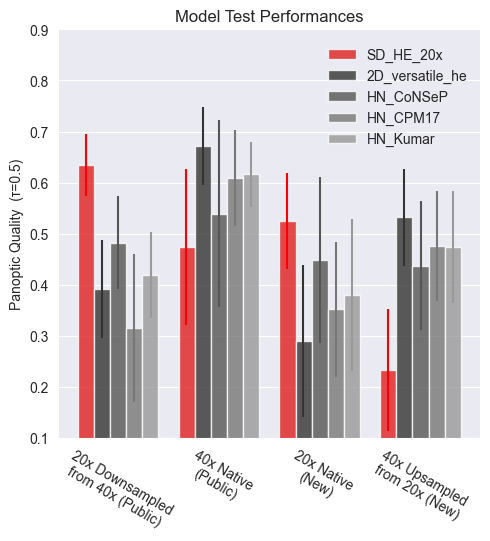

In [20]:
for i, df in enumerate(dfs):
    df.loc[df[('Interpolation', '')] == 'L - 40x - __', ('Interpolation', '')] = '40x Native\n(Public)'
    df.loc[df[('Interpolation', '')] == 'R - 20x - __', ('Interpolation', '')] = '20x Native\n(New)'
    df.loc[df[('Interpolation', '')] == 'L - 20x - 1_', ('Interpolation', '')] = '20x Downsampled\nfrom 40x (Public)'
    df.loc[df[('Interpolation', '')] == 'R - 40x - 1_', ('Interpolation', '')] = '40x Upsampled\nfrom 20x (New)'
    df = df[(df[('Interpolation', '')] == '40x Native\n(Public)') | (df[('Interpolation', '')] == '20x Native\n(New)') | \
            (df[('Interpolation', '')] == '20x Downsampled\nfrom 40x (Public)') | (df[('Interpolation', '')] == '40x Upsampled\nfrom 20x (New)')]
    dfs[i] = df

data = []
for i, df in enumerate(dfs):
    for interp, pq_mean, pq_std in zip(df[('Interpolation', '')], df[('Panoptic Quality', 'mean')], df[('Panoptic Quality', 'std')]):
        data.append(pd.DataFrame({'Interpolation': [interp], 'Panoptic Quality (mean)': [pq_mean], 'Panoptic Quality (std)': [pq_std], 'Model': [models[i]]}))
df_concat = pd.concat(data)

custom_palette = sns.color_palette(['red', '#333333', '#555555', '#777777', '#999999'])
g = sns.catplot(data=df_concat, x='Interpolation', y='Panoptic Quality (mean)', hue='Model', kind='bar', palette=custom_palette, alpha=0.8, legend=False)
g.despine(left=True)
plt.legend(title=None, loc='upper right', framealpha=0.0, bbox_to_anchor=(1, 0.985))

bar_width = 0.3229
x_shift = np.linspace(-bar_width, bar_width, len(df_concat['Model'].unique()))
for i, model in enumerate(df_concat['Model'].unique()):
    model_data = df_concat[df_concat['Model'] == model]
    x = np.arange(len(model_data['Interpolation'])) + x_shift[i]
    y = model_data['Panoptic Quality (mean)']
    yerr = model_data['Panoptic Quality (std)']
    plt.errorbar(x, y, yerr=yerr, fmt='none', capsize=0, label=model, color=custom_palette[i])

plt.title('Model Test Performances')
plt.ylabel('Panoptic Quality  (τ=0.5)')
plt.xlabel(None)
plt.ylim(0.1, 0.9)
plt.xticks(ticks=np.arange(len(df_concat['Interpolation'].unique())), labels=df_concat['Interpolation'].unique(), rotation=-30)
plt.savefig('chart.png', bbox_inches='tight')
plt.show()